<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Discrete_Cosine_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title{display-mode: "form"}

# This code will be hidden when the notebook is loaded.
from scipy.fftpack import fft, dct, idct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

def create_animation_data(samples:int=8, iterations:int=100, **kwargs):
  """ create data for animated plots
      samples: # of discrete samples from the signal
      iterations: each iteration corresponds to
                  the data for one frame in the animated plot
      offset: (min,max) of the range of offsets to apply to the signal
      scalar: (min,max) of the scalar applied to the signal
      freq:   (min,max) of the frequency multiplier applied to the signal

      The values for offset/scalar/freq applied to each frame are evenly spaced
      real values in the specified (min, max) range
  """
  offset_range = kwargs.get('offset',None)
  scalar_range = kwargs.get('scalar',None)
  freq_range = kwargs.get('freq',None)
  title = ""

  if offset_range!=None:
    offsets = np.append(np.linspace(offset_range[0],offset_range[1],iterations//2),np.linspace(offset_range[1],offset_range[0],iterations//2))
    title="Effect of adding an offset"
  else:
    offsets = np.zeros(iterations)

  if scalar_range!=None:
    scalars = np.append(np.linspace(scalar_range[0],scalar_range[1],iterations//2),np.linspace(scalar_range[1],scalar_range[0],iterations//2))
    title="Effect of scaling"
  else:
    scalars=np.ones(iterations)

  if freq_range!=None:
    freqs = np.append(np.linspace(freq_range[0],freq_range[1],iterations//2),np.linspace(freq_range[1],freq_range[0],iterations//2))
    title="Effect of changing frequency"
  else:
    freqs=np.ones(iterations)

  data = []
  for i in range(iterations):
    k = np.linspace(0,np.pi, samples)
    y = offsets[i]+scalars[i]*np.cos(freqs[i]*k)
    x = np.linspace(0, samples-1, samples)
    yc = offsets[i]+scalars[i]*np.cos(freqs[i]*np.linspace(0,np.pi, samples*10))
    xc = np.linspace(0,samples-1,samples*10)
    x1 = x
    y1 = dct(y, norm='ortho')
    xinv = x
    yinv = idct(y1, norm='ortho')
    data.append({'x':x,'y':y,'xc':xc, 'yc':yc,'x1':x,'y1':y1,'xinv':xinv,'yinv':yinv,'title':title})
  return data


### Basis Vectors

Any vector can be written as a sum of coefficients times the basis vectors. The basis for a vector space $V$, is a set of vectors that are linearly independent and spans $V$.

For example, a vector $\vec v \in V$ can be written as

$\vec v = \begin{bmatrix}
c_0\\
c_1\\
\end{bmatrix}
= c_{0}\begin{bmatrix}
1\\
0\\
\end{bmatrix}+
c_{1}\begin{bmatrix}
0\\
1\\
\end{bmatrix}
$

where $c_0, c_1$ are the coefficients and
$\begin{bmatrix}
1\\
0\\
\end{bmatrix}$,
$\begin{bmatrix}
0\\
1\\
\end{bmatrix}$ are the basis vectors

<br><br>

If we change the basis vectors to
$\begin{bmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}\\
\end{bmatrix}$,
$\begin{bmatrix}
\frac{1}{\sqrt{2}}\\
\frac{-1}{\sqrt{2}}\\
\end{bmatrix}$ , the same vector can be written as
<br><br>

$\vec v = d_{0}\begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\\\end{bmatrix} + d_{1}\begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{-1}{\sqrt{2}}\\\end{bmatrix}=\begin{bmatrix}\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\\end{bmatrix}\begin{bmatrix}d_{0}\\d_{1}\\\end{bmatrix}$


### Discrete Cosine Transform

The discrete cosine transform (DCT) decomposes a given signal into a series of harmonic cosine functions.
<br>
<br>
Given a signal represented by a 1D input vector $\vec x$ of size $N$

$\vec x = [x_{0}, x_{1},...,x_{N-1}]$
<br>
<br>
The discrete cosine transform of $\vec x$ returns a set of coefficients $X$ for the cosine basis functions

$X = [X_{0},X_{1},...,X_{N-1}]$
<br>
<br>
This transformation can be thought of as a change of basis similar to the previous example of vector $\vec v$
<br>
<br>
$k^{th}$ DCT coefficient for input $\vec x$ is given by
<br>
<br>
$X_k = \sum_{n=0}^{N-1} x_n cos[\frac{\pi}{N}(n+\frac{1}{2})k]$

<br>
<br>

- The input vector in practice can be any signal, such an audio signal, or pixels in an image
- Large values of higher coefficients imply high frequency changes. e.g., rapidly changing pixels in an image, such as text
- Large values of lower coefficients mean the signal is changing less rapidly
- The $X_0$ component is high if the signal is constant

In [3]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
N = 8 #input size
x = np.cos(np.linspace(0,np.pi, N)) # input vector

np.set_printoptions(1,suppress=True)
print("Given input -")
print(f"x  = {x}")
X = np.zeros(N)
for k in range(N):
  for n in range(N):
    X[k] = X[k]+ x[n]*np.cos((np.pi/N)*(n+0.5)*k)
print("\nDCT coefficients are computed as -")
print(f"X  = {X}")
X2 = dct(x,type=2,norm='ortho')
print("\nDCT from scipy.fftpack.dct is -")
print(f"X2 = {X2}")

Given input -
x  = [ 1.   0.9  0.6  0.2 -0.2 -0.6 -0.9 -1. ]

DCT coefficients are computed as -
X  = [ 0.   4.2  0.  -0.2  0.  -0.   0.  -0. ]

DCT from scipy.fftpack.dct is -
X2 = [ 0.   2.1 -0.  -0.1 -0.  -0.  -0.  -0. ]


Plotting the input values as pixels, and the DCT coefficients as a scatter plot, we can see various components in the input

<ipython-input-4-4e8a3ef49747>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


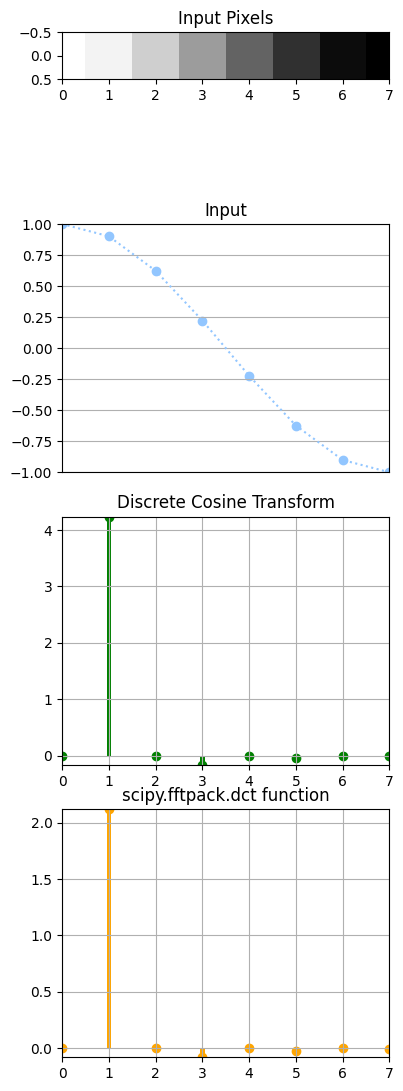

In [4]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(4,1, figsize=(4,12));
fig.suptitle("")
fig.tight_layout()

im = ax[0].imshow(x.reshape(1,N), cmap='gray')
ax[0].set_xlim(0,N-1)
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(True)
#ax[0].axis('off');
ax[0].set_title('Input Pixels')

ax[1].grid(True)
ax[1].set_title('Input')
ax[2].grid(True)
ax[2].set_title('Discrete Cosine Transform')
ax[3].grid(True)
ax[3].set_title('scipy.fftpack.dct function')



ax[1].set_xlim(0,N-1)
ax[1].get_xaxis().set_visible(False)
ax[1].grid(True)
ax[1].set_ylim(np.min(x), np.max(x))
ax[2].set_xlim(0,N-1)
ax[2].set_ylim(np.min(X), np.max(X))
ax[1].plot(list(range(0,N)), x, linestyle='dotted');
ax[1].scatter(list(range(0,N)), x); #sample points
ax[2].bar(list(range(0,N)), X, color='green', width=.1);
ax[2].scatter(list(range(0,N)), X, color='green');

ax[3].set_xlim(0,N-1)
ax[3].set_ylim(np.min(X2), np.max(X2))
ax[3].bar(list(range(0,N)), X2, color='orange', width=.1);
ax[3].scatter(list(range(0,N)), X2, color='orange');

Most coefficients are zeros. Using only the few non-zero coefficients, we can recreate the input with imperceptible loss. This is basis of compression algorithms used in JPEG, HEIC, MPEG etc.

Given the coefficients

$X=[X_0,X1,...X_{N-1}]$
<br>
<br>
We can recreate the original signal

$\vec y = DCT^{-1}(X)$


y = [ 1.   0.9  0.6  0.2 -0.2 -0.6 -0.9 -1. ]


<ipython-input-5-14d23c647383>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


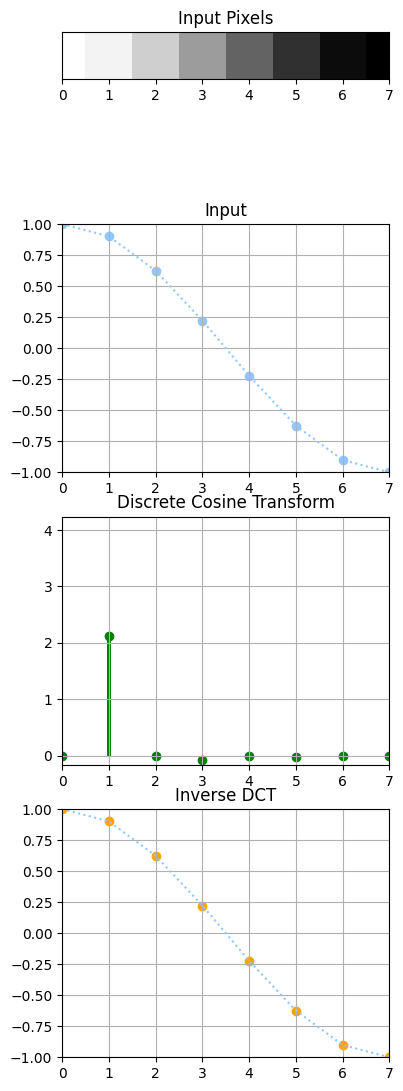

In [5]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

y = idct(X2, norm='ortho')
print(f"y = {y}")

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(4,1, figsize=(4,12));
fig.suptitle("")
fig.tight_layout()

im = ax[0].imshow(x.reshape(1,N), cmap='gray')
ax[0].set_xlim(0,N-1)
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(False)
#ax[0].axis('off');
ax[0].set_title('Input Pixels')

ax[1].grid(True)
ax[1].set_title('Input')
ax[2].grid(True)
ax[2].set_title('Discrete Cosine Transform')
ax[3].grid(True)
ax[3].set_title('Inverse DCT')



ax[1].set_xlim(0,N-1)
ax[1].get_xaxis().set_visible(True)
ax[1].grid(True)
ax[1].set_ylim(np.min(x), np.max(x))
ax[2].set_xlim(0,N-1)
ax[2].set_ylim(np.min(X), np.max(X))
ax[1].plot(list(range(0,N)), x, linestyle='dotted');
ax[1].scatter(list(range(0,N)), x); #sample points
ax[2].scatter(list(range(0,N)), X2, color='green');
ax[2].bar(list(range(0,N)), X2, color='green',width=.1);

ax[3].set_xlim(0,N-1)
ax[3].set_ylim(np.min(y), np.max(y))
ax[3].plot(list(range(0,N)), y, linestyle='dotted');
ax[3].scatter(list(range(0,N)), y, color='orange');

Changing the frequency of the input signal (rapid changes in pixel intensities in case of an image) changes the DCT coefficients corresponding to that frequency.

Given input -
x = [ 1.  -0.2 -0.9  0.6  0.6 -0.9 -0.2  1. ]

DCT coefficients are -
X = [ 0.4  0.   0.6  0.   1.9 -0.  -0.5 -0. ]


<ipython-input-6-0709f06fc581>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


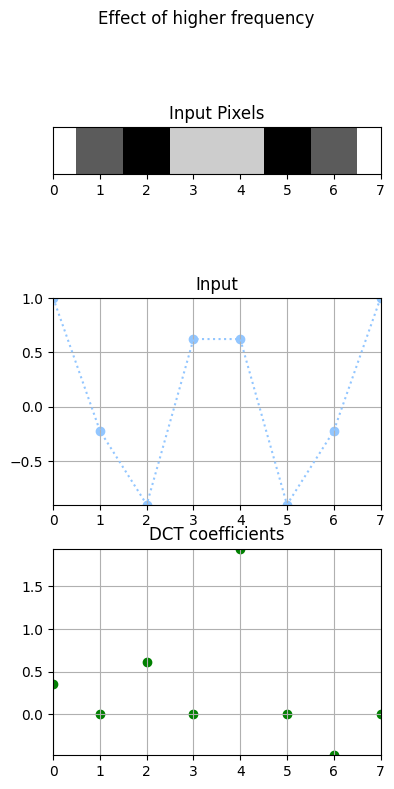

In [6]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

N = 8 #input size
x = np.cos(4*np.linspace(0,np.pi, N)) # input vector

np.set_printoptions(1,suppress=True)
print("Given input -")
print(f"x = {x}")
X = dct(x,type=2,norm='ortho')
print("\nDCT coefficients are -")
print(f"X = {X}")

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(3,1, figsize=(4,8));
fig.suptitle("Effect of higher frequency")
fig.tight_layout()

im = ax[0].imshow(x.reshape(1,N), cmap='gray')
ax[0].set_xlim(0,N-1)
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(False)
#ax[0].axis('off');
ax[0].set_title('Input Pixels')

ax[1].grid(True)
ax[1].set_title('Input')
ax[2].grid(True)
ax[2].set_title('DCT coefficients')

ax[1].set_xlim(0,N-1)
ax[1].get_xaxis().set_visible(True)
ax[1].grid(True)
ax[1].set_ylim(np.min(x), np.max(x))
ax[2].set_xlim(0,N-1)
ax[2].set_ylim(np.min(X), np.max(X))
ax[1].plot(list(range(0,N)), x, linestyle='dotted');
ax[1].scatter(list(range(0,N)), x); #sample points
ax[2].scatter(list(range(0,N)), X, color='green');

### Basis Vectors

We can get the basis vectors by setting the corresponding coefficient to 1 and the rest to zeros, then taking the inverse DCT with those coefficients.

For example,

$DCT^{-1}\Big(\big[0,1,0,0,0,0,0,0\big]\Big)$

will create the basis function corresponding to the 2nd coefficient
<br><br>
Plotting the basis vectors corresponding to each coefficient, we can see that they are successively higher frequencies

<ipython-input-7-5f58cf3fad23>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


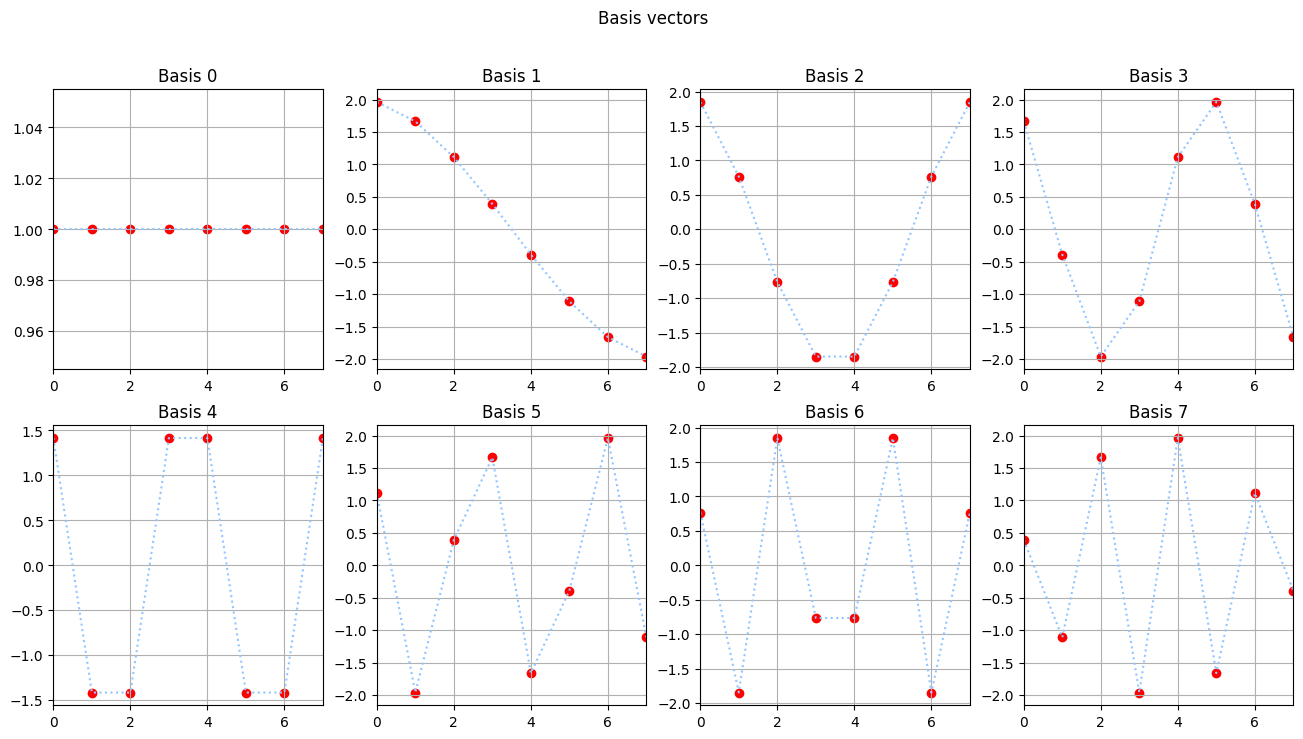

In [7]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

N=8
bases = []
for i in range(N):
  coeffs = np.zeros(N)
  coeffs[i]=1
  bases.append(coeffs)

plt.style.use('seaborn-pastel')
rows = 2
columns = 4
fig, ax = plt.subplots(rows,columns, figsize=(16,8));
fig.suptitle("Basis vectors")


for row in range(rows):
  for col in range(columns):
    idx = columns*row+col
    ax[row][col].grid(True)
    ax[row][col].set_xlim(0,N-1)
    ax[row][col].set_visible(True)
    ax[row][col].set_visible(True)
    ax[row][col].set_title(f"Basis {idx}")
    ax[row][col].plot(list(range(N)),idct(bases[idx]), linestyle='dotted')
    ax[row][col].scatter(list(range(N)), idct(bases[idx]), color='red')

### 2 Dimensions

The same idea can be applied to images which have 2 dimensions compared to the 1D vectors discussed so far. The same 1D transform is applied to each row and column of the image. The 2D basis images are the outer products of the 1D basis vectors.

In [8]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

def dct2d(x):
    return dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho' )

def idct2d(x):
    return idct(idct(x, axis=0 , norm='ortho'), axis=1 , norm='ortho')

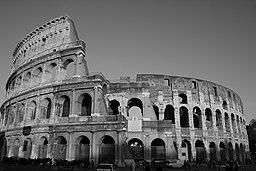

In [9]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from PIL import Image
import requests

im = Image.open(requests.get('https://raw.githubusercontent.com/vinayshanbhag/math/master/256px-Colosseo.jpg', stream=True).raw)
im

In [10]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
image_data = np.array(im)
print(f"Image Size:{image_data.shape}")

Image Size:(171, 256)


In [11]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
imsize = image_data.shape
dct_out = np.zeros(imsize)

# Divide the image in 8x8 blocks and peform 2d DCT on each block
for i in range(0,imsize[0],8):
    for j in range(0,imsize[1],8):
        dct_out[i:(i+8),j:(j+8)] = dct2d(image_data[i:(i+8),j:(j+8)] )

An 8x8 block of pixels from the image, and corresponding DCT coefficients.

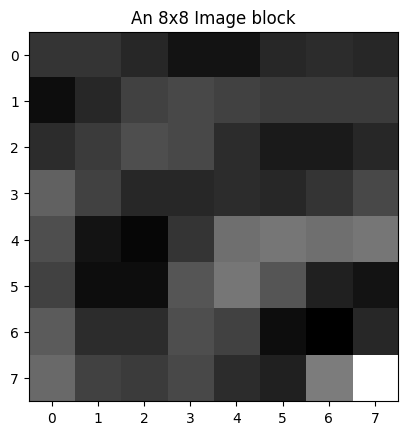

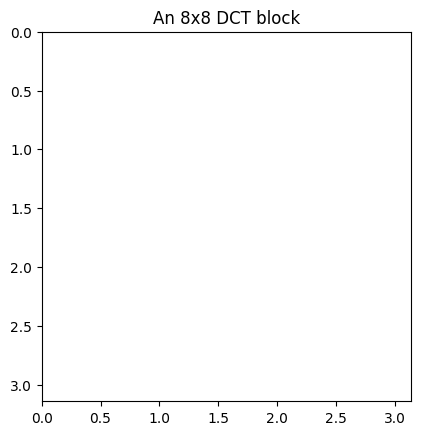

In [13]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
pos = 24

# Extract a block from image
plt.figure()
plt.imshow(image_data[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block");

# Display the dct of that block
plt.figure()
plt.imshow(image_data[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(image_data)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block");

All 8x8 blocks of DCT coefficients for the input image

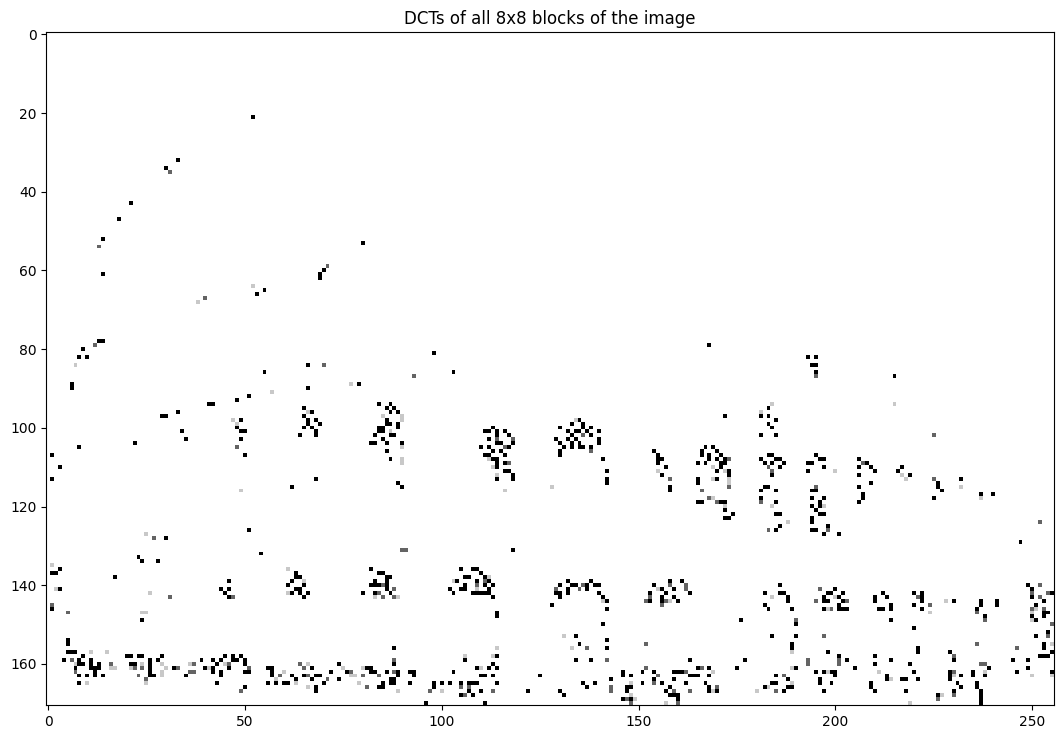

In [14]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
# Display entire DCT
plt.figure(figsize=(13,9));

plt.imshow(image_data,cmap='gray',vmax = np.max(image_data)*.01,vmin = 0);
plt.title( "DCTs of all 8x8 blocks of the image");

Apply a threshold to the DCT coefficients such that values (abs) below the threshold are discarded (set to zero)

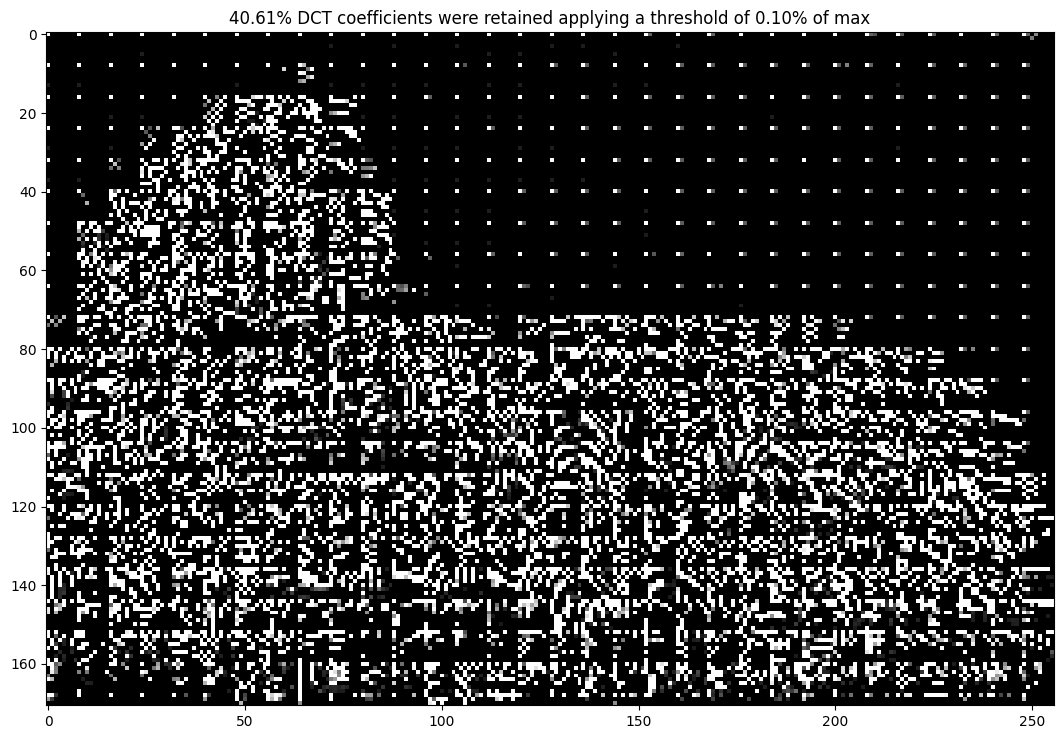

In [15]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Apply a threshold to the DCT coefficients such that
# coefficients below the threshold are set to zero (discarded)
t = 0.001
dct_thresholded = dct_out * (abs(dct_out) > (t*np.max(dct_out)))


plt.figure(figsize=(13,9))
plt.imshow(dct_thresholded,cmap='gray',vmax = np.max(dct_thresholded)*0.01,vmin = 0)
pct_retained = np.sum( dct_thresholded != 0.0 ) / (imsize[0]*imsize[1]*1.0)
plt.title( f"{pct_retained*100:0.2f}% DCT coefficients were retained applying a threshold of {t*100:0.2f}% of max");

Recreate the image from the thresholded DCT coefficients, using the 2D inverse DCT. Compare original image, with the one recreated from DCT coefficients.

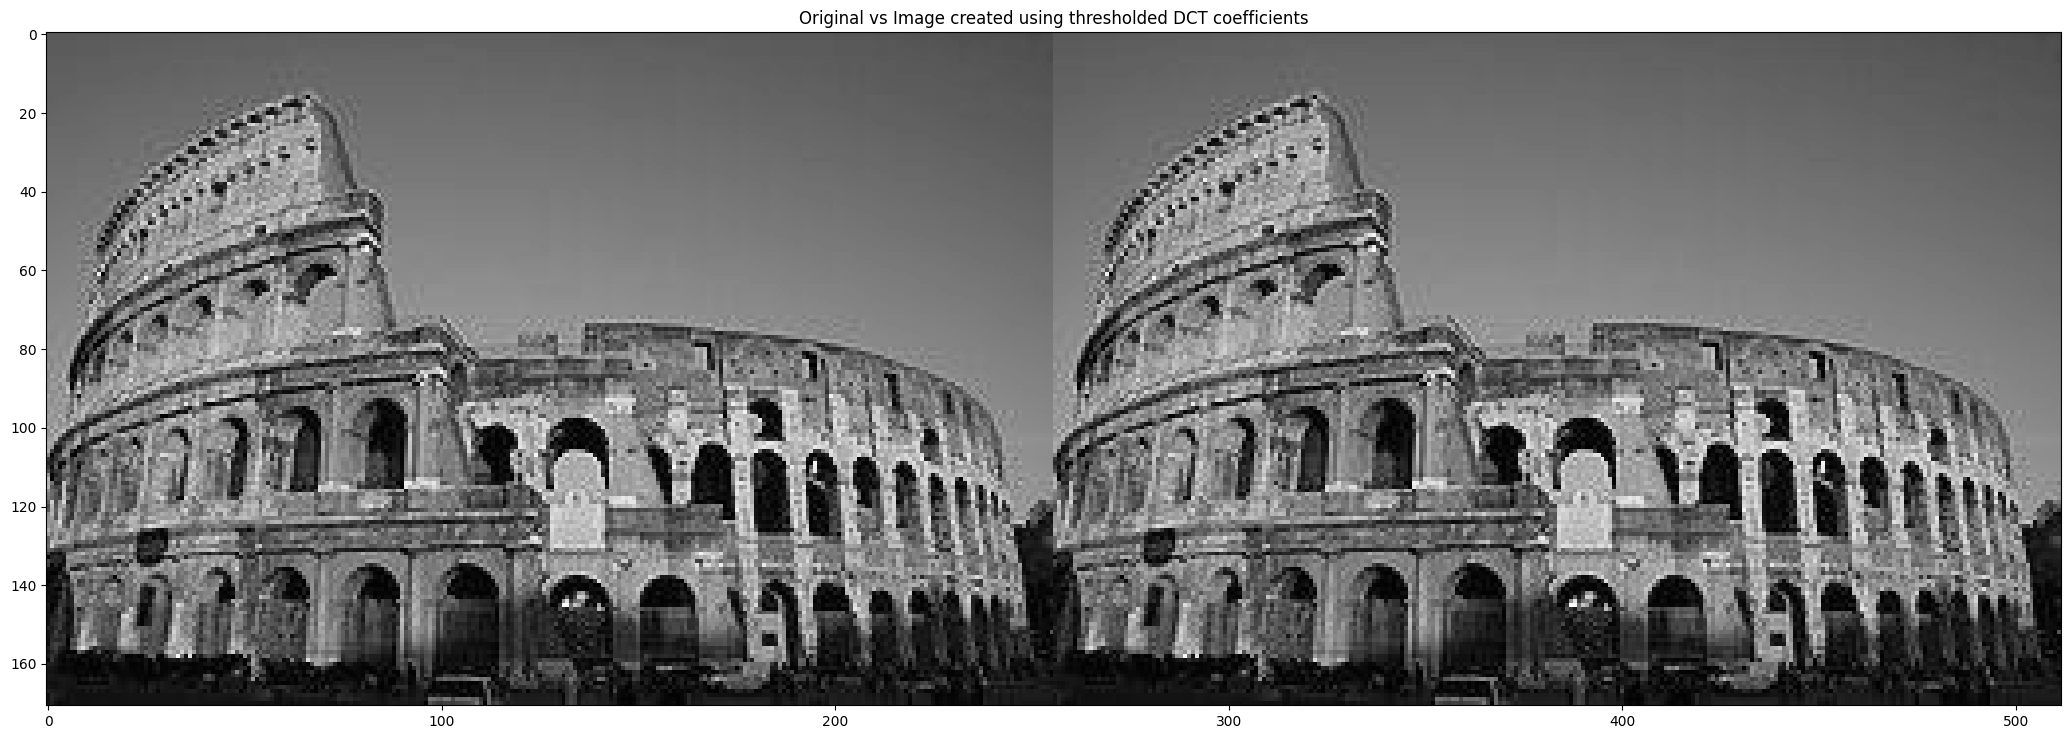

In [16]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
image_from_dct = np.zeros(imsize)

for i in range(0,imsize[0],8):
    for j in range(0,imsize[1],8):
        image_from_dct[i:(i+8),j:(j+8)] = idct2d( dct_thresholded[i:(i+8),j:(j+8)] )


plt.figure(figsize=(26,9))
plt.imshow( np.hstack( (image_data, image_from_dct)) ,cmap='gray')
plt.title("Original vs Image created using thresholded DCT coefficients" );

### Misc

Create animated plots showing effects of scaling, adding an offset and changing the frequency of the input signal

In [17]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
iter_data = create_animation_data(scalar=(-1,1)) + create_animation_data(offset=(-1,1)) + create_animation_data(freq=(0,8))

<ipython-input-18-982e6cf07f13>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


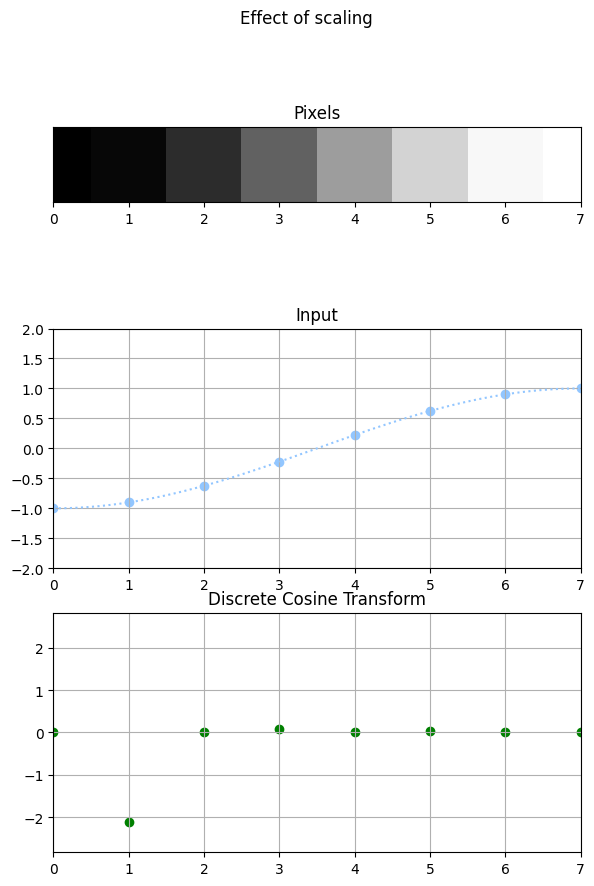

In [18]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
get_range = lambda x, a: (min([min(d[a]) for d in x]),max([max(d[a]) for d in x]) )
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(3,1, figsize=(6,9));
fig.suptitle("Effect of higher frequencies")
fig.tight_layout()


im = ax[0].imshow(np.repeat(np.array([iter_data[1]['y']]),1, axis=0), cmap='gray')
ax[0].set_xlim(get_range(iter_data,'x'))
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(False)
#ax[0].axis('off');
ax[0].set_title('Pixels')

ax[1].grid(True)
ax[1].set_title('Input')
ax[2].grid(True)
ax[2].set_title('Discrete Cosine Transform')



ax[1].set_xlim(get_range(iter_data,'x'))
ax[1].get_xaxis().set_visible(True)
ax[1].grid(True)
ax[1].set_ylim(get_range(iter_data,'y'))
ax[2].set_xlim(get_range(iter_data,'x'))
ax[2].set_ylim(get_range(iter_data,'y1'))
line0, = ax[1].plot([], [], linestyle='dotted');#continuous signal
scat0 = ax[1].scatter([], []); #sample points
scat = ax[2].scatter([],[], color='green');


def animate(i):
    # Discrete samples
    x = iter_data[i]['x']
    y = iter_data[i]['y']

    # points to plot continuous signal correspnding to the samples
    yc = iter_data[i]['yc']
    xc = iter_data[i]['xc']

    #DCT coeff
    x1 = iter_data[i]['x1']
    y1 = iter_data[i]['y1']

    #plot
    line0.set_data(xc, yc)
    scat0.set_offsets([[b[0],b[1]] for b in zip(x,y)])
    scat.set_offsets([[b[0],b[1]] for b in zip(x,y1)])
    fig.suptitle(iter_data[i]['title'])

    im.set_array(np.repeat(np.array([iter_data[i]['y']]),1, axis=0))
    return im, line0, scat0, scat

anim = FuncAnimation(fig, animate, frames=len(iter_data), interval=100, blit=True);


In [19]:
#@title {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
display(HTML(anim.to_html5_video()))

<video width="320" height="240" controls>
  <source src="https://github.com/vinayshanbhag/math/raw/master/DCT.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>

<video width="320" height="240" controls>
  <source src="https://github.com/vinayshanbhag/math/raw/master/DCT.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>